# I. Overview / Abstract

Emma Brugman, Faith Aloboudi, and Emily Wurst’s BIPN 162 project is on Hazlett et al. 2017’s deep-learning model for predicting Autism Spectrum Disorder (ASD) at 24 months in high-risk infants aged 6-12 months. 	

#### Abstract

This notebook aims to reproduce the results on ASD brain pathology and diagnosis prediction for high-risk (HR) infants for ASD from Hazlett et al.'s 2017 article "Early brain development in infants at high risk for autism spectrum disorder". Specifically, in this notebook we create data based off the study's adjusted group means for total brain volume (TBV), total surface area (TSA), and total corticol thickness (TCT) measured at 6 months, 12 months, and 24 months for infants in the three diagnostic categories, low-risk negative for ASD (LR-NEG), high-risk negative for ASD (HR-ASD), and high-risk positive for ASD (HR-ASD). With this data, we affirm the sudy's findings that TBV growth between 6-24 months is the best brain feature for predicting ASD in infants at 24 months. Lastly, we recreate the study's prediction pipeline to demonstrate TBV's applicability for disgnosing ASD for HR infants. 

# II. Introduction & Background

Scientific question: What is the early brain pathology timeline for ASD development in infants? Can a feature of this brain pathology timeline be used to predict autism in infants to produce earlier diagnoses?

The basis of an ASD diagnosis is behavioral symptoms which typically begin 3 to 4 years into the child's life (Shen et al. 2017). For ASD in particular, researchers have failed to come up with a behavioral-based model for predicting ASD before early childhood (Ozonoff et al. 2010). However, ASD researchers know that there is marked differences in brain development between the first and second year of life for children with ASD versus children without ASD (Shen et al. 2013), however this pathology does not have a well-defined timeline. This difference in brain development could provide researchers with a possible objective quantitative variable to diagnose infants with ASD providing for earlier intervention and improved quality of life (Hazlett et al. 2005). Additionally, because behavioral analysis may be subjective from clinician to clinician or difficult to obtain in low-functioning or infant patients, quantitative information is desired for predictive diagnosis modeling. Hazlett et al. 2017 aims to define the early brain pathology timeline for infants. This is accomplished through a longitudinal study that takes MRI scans of infants' brains to track total brain volume, total surface area, and total corticol thickness at 6 months, 12 months, and 24 months. The researchers in Hazlett et al. 2017 isolated total brain volume as a variable to predict an ASD diagnosis in high-risk infants. Through their research, they were able to build a deep-learning model to predict ASD at 24 months in children at high-risk for ASD with MRI scans from 6 months, 12 months, and 24 months. 

# III. Replication and Creating the Dataset

## Information about the present study’s dataset


Based on preceding studies that stated that brain enlargement has been seen in children with ASD at ages 2-4 years, the researchers hypothesized that an increase in brain volume occurs early in a child’s development. Because of this, researchers chose to analyze children who were at high risk or low risk for developing ASD based on their familial history. Infants in the study were evaluated at 6, 12 and 24 months of age, notably before the 2 year mark which is considered critical development. They were evaluated using behavioral assessments and magnetic resonance imaging (MRI) to analyze potential trajectories of behaviors and brain development related to ASD. 

The study used a longitudinal study of 318 infants at high familial risk for ASD, and a separate group of 117 infants at low familial risk (LR) for ASD. The longitudinal study of 318 infants was further split into two groups: 70 HR positive for ASD (HR-ASD) and 248 HR negative for ASD (HR-neg). In total, there was 435 participants in this study. In the study, only 15 HR-ASD, 91 HR-NEG, and 42 LR-NEG infant MRI scans were used. We simulated a dataset and decided to use the original number intended in the study since our data is generated and a high sample size may have more accurate/interesting results. We also generated an additional set using an increased noise level and added randomness to take into account human variability. 

MRI scans were taken at 6, 12, and 24 months tracking total brain volume (tbv), total surface area (tsa), and total coritcol thickness(tct) for each of the participants. After performing image processing, researchers found a statistically significant difference in the rate of tbv growth between children HR-ASD versus HR-neg and LR-neg.

# A. Data Wrangling

## Generating the Data

In [1]:
#importing numpy, pandas, and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# longitudinal study of 318 HR infants found 70 who met the clinical best-estimate criteria for ASD
HR_ASD = 70
# the same longitudinal study of 318 HR infants found that the remaining 248 did not meet the best-estimate criteria for ASD
HR_NEG = 248
# 117 infants at low rish for ASD who also did not meet criteria
LR_NEG = 117

#total_children = 435, representing the total number of children in the study
total_children = HR_ASD + HR_NEG + LR_NEG

# creating a list of labels proportional to the study's data categorizations
categories = ["HR-ASD"] * HR_ASD + ["HR-NEG"] * HR_NEG + ["LR-NEG"] * LR_NEG

# turning categories into an array to use later with pandas
categories_array = np.array(categories)

For generating the data, we will first make an empty Pandas DataFrame for the 435 total subjects represented in the study. To limit the number of features therefore make graphing and analysis easier, we will have each subject represented three times in the data frame and have the measurement for 6, 12, and 24 month for each variable (tbv, tsa, and tct) represented in the same column. Therefore, the total number of rows will be 453 * 3 = 1305, and the number of features to 3 (tbv, tsa, tct).

In [3]:
# defning the months in int form to use for creating our dataframe
month_list = [6, 12, 24] 

In [4]:
# initializing an empty series
s=pd.Series(dtype=float)

# this for-loop creates three rows (6 , 12, 24) for each subject of total_children to account for all measurements
for i in range(total_children):
    s_new=pd.Series(month_list)
    s=pd.concat([s, s_new], ignore_index=True)

# creates a DataFrame from s
month_df = s.to_frame(name="month")
print("The total number of columns in the DataFrame is " + str(month_df.shape[0]))

The total number of columns in the DataFrame is 1305


In [5]:
# creating a new array that represents subjects diagnosis in total_children three times to account for their three measurements
categories_array_new = (["HR-ASD"] * HR_ASD)*3 + (["HR-NEG"] * HR_NEG)*3 + (["LR-NEG"] * LR_NEG)*3

# creates a DataFrame from categories_array_new to be merged with month_df
categories_df = pd.DataFrame(categories_array_new, columns = ["category"])

In [6]:
# merges month_df and categories_df on their index, this DataFrame will be filled later
month_categories_df = pd.merge(month_df, categories_df, left_index = True, right_index = True)

In [7]:
# creates subject names in form of "subject_x"
# this will allow us to keep track of what data point belongs to which subject
# this will also allow all measurements of one brain part at different time periods under the same feature

# initializes empty subject series
s_subject = pd.Series(dtype=str)

# for each child we will create a "subject_x" label 3 times to keep track of their measurements at 6, 12, and 18 months in the same column
for i in range(total_children):
    subject_list_unique = np.array(["subject_" + str(i)]*3)
    subject_series_unique = pd.Series(subject_list_unique)
    s_subject=pd.concat([s_subject, subject_series_unique], ignore_index=True)

# creating a DataFrame from s_subject series to be merged on index with empty_df
subject_df = s_subject.to_frame(name="subject")

In [8]:
# creates a DataFrame by merging month_categories_df
empty_df_final = pd.merge(month_categories_df, subject_df, left_index = True, right_index = True)

# sets index to subject =
df_empty = empty_df_final.set_index("subject")
df_empty.head()

,month,category
subject,,
subject_0,6,HR-ASD
subject_0,12,HR-ASD
subject_0,24,HR-ASD
subject_1,6,HR-ASD
subject_1,12,HR-ASD


This empty DataFrame now has each subject noted three times to account for three separate measurements under each feature (tbv, tsa, tct) and their respective diagnosis. The "subject" index, "month", and "category" will be used to track the paricipant with their age in months and their diagnosis. 

### Variable 1: TBV (total brain volume) (mm^3)

After collecting the scans and completing image processing, total brain tissue volume (TBV) was calculated in the original study using the sum of all white matter and grey matter contained in the brain cavity.

This function is based off of Hazlett et al.'s 2017's Extended Data Table 2 | Group differences in developmental trajectories and cross-sectional volumes by age (Hazlett et al. 10). The base of the data is the reported adjusted group mean (AGM) for each category (LR-NEG, HR-NEG, and HR-ASD) for each time of measurement (6 months, 12 months, 24 months)

#### DataFrame of AGM for TBV from Hazlett et al. 2017 (Extended data figure 2)

In [9]:
tbv_agm_data = {"month" : [6, 12, 24],
"LR-NEG" : [748_890, 893_167, 1_024_297],
"HR-NEG" : [762_420, 914_391, 1_037_714],
"HR-ASD" : [771_401, 935_189, 1_095_002]}

tbv_agm_df = pd.DataFrame(tbv_agm_data)
tbv_agm_df

,month,LR-NEG,HR-NEG,HR-ASD
0,6,748890,762420,771401
1,12,893167,914391,935189
2,24,1024297,1037714,1095002


In [10]:
# this functions gets close to reproducing the adjusted group mean (AGM) TBV for each category (LR-NEG, HR-NEG, and HR-ASD)
# for each respective time measurement (6 months, 12 months, and 24 months)
# these values are TBV^-3 millimeter^3 (mm^3), meaning this function will produce a value like 700.000 which should be interpreted as 700,000 (mm^3)

# inputs are "category" (from DataFrame), "month" (from DataFrame), and noise_level (set to 5)
def find_tbv(category, month, noise_level):
    val = 0
    # draws a value random value between -noise_level and noise_level and multiplies it by month to add vairation to the data
    noise = month * np.random.uniform(-noise_level, noise_level)
    
    # executes for the "LR-NEG" category
    if category == "LR-NEG":
        # executes for LR-NEG's 6 and 12 month row
        if month <= 12:
            # estimates the AGM for LR-NEG (Hazlett et al.'s AGM: 6 months = 748_890, 12 months = 893_167)
            return month * 45 / 2 + 605 + noise 
        # estimates the AGM of LR-NEG at 24 months (Hazlett et al.'s AGM: 24 months = 1_024_297)
        return month * 125 / 12 + 750 + noise 
    
    # executes for the "HR-NEG" category
    elif category == "HR-NEG":
        # executes for HR-NEG's 6 and 12 month row
        if month <= 12:
            # estimates the AGM for HR-NEG (Hazlett et al.'s AGM: 6 months = 762_420, 12 months = 914_391)
            return month * 26 + 600 + noise 
        # estimates the AGM of HR_NEG at 24 months (Hazlett et al.'s AGM: 24 months = 1_037_714)
        return month * 35 / 3 + 760 + noise 
    
    # executes for the "HR-ASD" category at 6 and 12 month row
    if month <= 12:
        #estimates the AGM from the study (Hazlett et al.'s AGM: 6 month = 771_403, 12 month = 935_189)
        return month * 95 / 3 + 570 + noise 
     # estimates the AGM for HR-ASD at 24 months (Hazlett et al.'s AGM: 24 months = 1_095_002)
    return month * 65 / 6 + 820 + noise 

# applies this function to the df DataFrame to create a tbv column
df_empty["tbv"] = df_empty.apply(lambda x : find_tbv(x["category"], x["month"], 5), axis = 1)

print("This is the DataFrame of data we will use to illustrate the TBV trend and use in our later predictions.")
df = df_empty
df.head()

This is the DataFrame of data we will use to illustrate the TBV trend and use in our later predictions.


,month,category,tbv
subject,,,
subject_0,6,HR-ASD,742.829428
subject_0,12,HR-ASD,947.999028
subject_0,24,HR-ASD,1199.926359
subject_1,6,HR-ASD,756.856778
subject_1,12,HR-ASD,988.446581


#### Preliminary data analysis of TBV data.

We will go through each category (LR-NEG, HR-NEG, and HR-ASD) and graph a collective line graph of each subject in the respective category than graph a line illustrating the average TBV development trajectory for each respective group.

In [11]:
def find_AGM(df, diagnosis, feature):
    '''
        description : finds the adjusted growth mean (AGM) 
        for a given disgnosis ("LR-NEG", "HR-NEG", "HR-ASD") 
        and feature ("tbv", "tsa", "tct")
        
        inputs : df : a DataFrame with a column for diagnosis and feature
                diagnosis : "LR-NEG", "HR-NEG", "HR-ASD"
                feature : "tbv", "tsa", "tct"
                
        returns : AGM for a given diagnosis and feature '''
    
    df_diagnosis = df[df.get("category") == diagnosis]
    
    df_diagnosis_6 = df_diagnosis[df_diagnosis.get("month") == 6]
    
    diagnosis_6_m = df_diagnosis_6[feature].mean() # AGM at 6 months
    
    df_diagnosis_12 = df_diagnosis[df_diagnosis.get("month") == 12]
    
    diagnosis_12_m = df_diagnosis_12[feature].mean() # AGM at 12 months
    
    df_diagnosis_24 = df_diagnosis[df_diagnosis.get("month") == 24]
    
    diagnosis_24_m = df_diagnosis_24[feature].mean() # AGM at 24 months
    
    y_avg_feature = [diagnosis_6_m, diagnosis_12_m, diagnosis_24_m]
    
    return y_avg_feature


In [12]:
def find_unit(feature):
    '''
        description : defines a unit for each feature
        to use in our create_line_plot function to label y-axis
        
        inputs : feature : a column in df (tbv, tsa, tct)
                
        returns : a string to use in axis label '''
    
    if feature == "tbv":
        unit = " x 10^3 (mm^3)"
    if feature == "tsa":
        unit = " (mm^2)"
    if feature == "tct":
        unit = " (mm)"
    return unit

In [13]:
def create_line_plot(df, diagnosis, feature):
    '''
    description : creates a line plot for a given diagnosis (LR-NEG, HR-NEG, or HR-ASD) 
                and feature (tvb, tsa, tct)
        
    inputs : df : df 
            diagnosis : "category" in df LR-NEG, HR-NEG, or HR-ASD)
            feature : a column in df (tbv, tsa, tct)
      
    returns : a graph of the given diagnosis and feature,
            the AGM line of a given diagnosis and feature, 
            and graph description'''
    
    AGM = find_AGM(df, diagnosis, feature)
    unit = find_unit(feature)
    df_diagnosis= df[df.get("category") == diagnosis]
    if diagnosis == "LR-NEG":
            color = "blue"
            for i in range(LR_NEG):
                x = df_diagnosis.loc["subject_" + str(i + HR_ASD + HR_NEG)].get("month").tolist()
                y = df_diagnosis.loc["subject_" + str(i + HR_ASD + HR_NEG)].get(feature).tolist()
                plt.plot(x, y, label = "line "+ str(i), linestyle = ":")
                plt.plot(month_list, AGM , label = "line ", linestyle = "-", color = color)
    if diagnosis == "HR-NEG":
            color = "green"
            for i in range(HR_NEG):
                x = df_diagnosis.loc["subject_" + str(i + HR_ASD)].get("month").tolist()
                y = df_diagnosis.loc["subject_" + str(i + HR_ASD)].get(feature).tolist()
                plt.plot(x, y, label = "line "+ str(i), linestyle = ":")
                plt.plot(month_list, AGM , label = "line ", linestyle = "-", color = color)
    if diagnosis == "HR-ASD":
            color = "red"
            for i in range(HR_ASD):
                x = df_diagnosis.loc["subject_" + str(i)].get("month").tolist()
                y = df_diagnosis.loc["subject_" + str(i)].get(feature).tolist()
                plt.plot(x, y, label = "line "+ str(i), linestyle = ":")
                plt.plot(month_list, AGM , label = "line ", linestyle = "-", color = color)
    
    print( "This graph shows " + feature +" rates of growth for all " + diagnosis + " infants.")
    print("The AGM for " + feature + " of " + diagnosis + " infants is " + str(AGM[0]) + " at 6 months, " \
          + str(AGM[1]) + " at 12 months, " + str(AGM[2]) + " at 24 months. This is represented by the " + color + " line.")
          

    # title
    plt.title(diagnosis + " " + feature + " growth rate")
    # x-axis label
    plt.xlabel("months")
    # y-axis label
    plt.ylabel(feature + unit)
    
    return plt.show()

This graph shows tbv rates of growth for all LR-NEG infants.
The AGM for tbv of LR-NEG infants is 740.6180430617821 at 6 months, 871.6631591738633 at 12 months, 989.1212080556712 at 24 months. This is represented by the blue line.


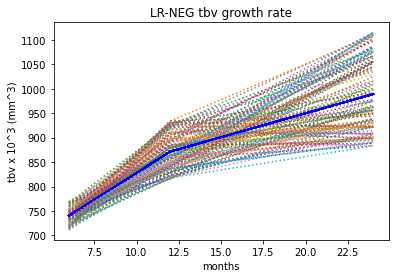

In [14]:
create_line_plot(df, "LR-NEG", "tbv")

This graph shows tbv rates of growth for all HR-NEG infants.
The AGM for tbv of HR-NEG infants is 755.2684218586573 at 6 months, 913.5301226234841 at 12 months, 1040.6131984003125 at 24 months. This is represented by the green line.


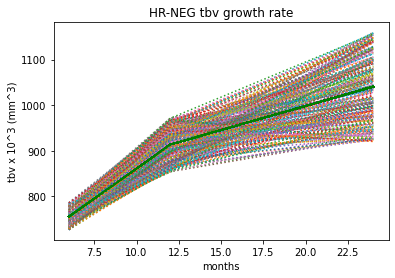

In [15]:
create_line_plot(df, "HR-NEG", "tbv")

This graph shows tbv rates of growth for all HR-ASD infants.
The AGM for tbv of HR-ASD infants is 757.9895287798048 at 6 months, 964.9846121332993 at 12 months, 1097.6595405496814 at 24 months. This is represented by the red line.


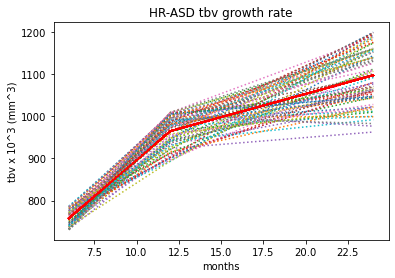

In [16]:
create_line_plot(df, "HR-ASD", "tbv")

In [17]:
def create_total_line_plot(df, feature):
    '''
    description : creates a line plot for all diagnoses in a given feature 
                and shows individual AGM line for each diagnosis
        
    inputs : df : df 
            feature : a column in df (tbv, tsa, tct)
      
    returns : a graph of all subjects for a given feature with
            an AGM line of each diagnosis '''
    
    for i in range(total_children):
        x = df.loc["subject_" + str(i)].get("month").tolist()
        y = df.loc["subject_" + str(i)].get(feature).tolist()
        
        # plotting all subjects in total_children
        plt.plot(x, y, label = "line "+ str(i), linestyle = ":")
        
        # LR-NEG is the blue line
        plt.plot(month_list, find_AGM(df, "LR-NEG", feature), label = "line LR-NEG"+ str(i), linestyle = "-", color = "blue")
        
        # HR-NEG is the green line 
        plt.plot(month_list, find_AGM(df, "HR-NEG", feature), label = "line HR-NEG"+ str(i), linestyle = "-", color = "green")
        
        # HR-ASD is the red line
        plt.plot(month_list, find_AGM(df, "HR-ASD", feature), label = "line HR-ASD"+ str(i), linestyle = "-", color = "red")

    # title
    plt.title(feature + " growth rate")
    # x-axis label
    plt.xlabel("months")
    # y-axis label
    plt.ylabel(feature + " " + find_unit(feature))
    
    return plt.show()

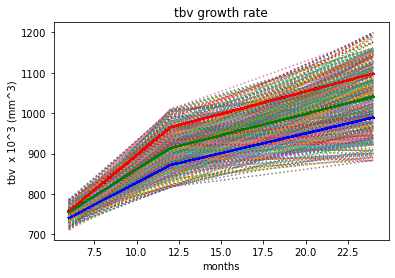

In [18]:
create_total_line_plot(df, "tbv")

#### Results:

The figure is reflective of a longitudal trajectory that compares age in months (x-axis) and total brain volume (TBV x 10^3 (mm^3) (y-axis). As one can see, the HR-ASD infants, whose AGM is represented by the red line, have a higher growth rate compared to LR-NEG (blue line) and HR-NEG (green line) infants. This closely resembles Hazlett et al.'s TBV graph in Figure 1 (2).  

The values start at very similar values in their first 12 months and as the children reach their 2nd year of life, the trajectories become more widespread as the growth rate of TBV children with ASD increases. 

This graph shows that TBV could be a great quantitative measurement for predicting ASD in HR infants since all three groups are clearly differentiated by their respective trajectories. This graph informs why the researchers in Hazlett et al. chose TBV at their quantitative measurement for their deep-learning model.

### Variable 2: Total Surface Area (mm^2)


In the original study, after collecting the scans and completing image processing, total surface area was measured at the mid-cortical surface.

#### DataFrame of AGM for TSA (mm^2) from Hazlett et al. 2017 (for reference)

In [19]:
tsa_agm_data = {"month" : [6, 12, 24],
"LR-NEG" : [51_736, 57_570, 67_933],
"HR-NEG" : [52_611, 58_979, 68_746],
"HR-ASD" : [52_779, 60_764, 72_281]}

tsa_agm_df = pd.DataFrame(tsa_agm_data)
print("This is the AGM for TSA from Hazlett et al. 2017.")
tsa_agm_df

This is the AGM for TSA from Hazlett et al. 2017.


,month,LR-NEG,HR-NEG,HR-ASD
0,6,51736,52611,52779
1,12,57570,58979,60764
2,24,67933,68746,72281


By just looking at the group means from Hazlett et al. (in the DataFrame above) accross time and for each diagnostic category, one can see how the TSA growth rate is more similar accross diagnostic categories compared to TBV. Our data and analysis will produce similar findings.

When designing how to create TSA data, we used the same linear equation for all months of measurement for LR-NEG and HR-NEG. This is because Hazlett et al. notes that TSA growth rate for these groups were consistent throughout the 6-12 months. Differently, Hazlett et al. notes that HR-ASD children did have a significant increase TSA growth in the first year of life but not in the second year. Thus, we use two linear equations to model this increased growth rate between 6-12 months and decreased growth rate from 12-24 month. The equations were modled after the Extended Data Table 2 (10).  

In [20]:
def find_tsa(category, month, noise_level):
    '''
        description : gets close to reproducing the data from Hazlett et al. 2017
        the function is based off of the AGM on Extended Data Table 2 (Hazlett et al. 2017 10)
        
        inputs : category : "category" column from df DataFrame
                month : "month" column from df DataFrame
                noise_level : value meant to vary the data
                
        returns : generated data for TSA based off of month of measurement and diagnosis '''
    val = 0
    noise = month * np.random.uniform(-noise_level, noise_level)
    if category == "LR":
        # estimates the AGM for LR-NEG (Hazlett et al.'s AGM: 6 months = 51_736, 12 months = 57_570, 24 month = 67_933)
        return month * 777.7778 + 47833.3333 + noise #LR

    if category == "HR-NEG":
        # estimates the AGM for HR-NEG (Hazlett et al.'s AGM: 6 months = 52_611, 12 months = 58_979, 24 month = 68_746)
        return month * 833.3333 + 48000 + noise #HR-NEG
    
    # estimates the AGM for HR-ASD (Hazlett et al.'s AGM: 6 months = 52_799, 12 months = 60_764, 24 month = 72_281)
    if category == "HR-ASD":
        if month <= 12:
            return month * 1150.558 + 46933.3333 + noise #HR-ASD
    return month * 1044.4444 + 46933.3333 + noise #HR-ASD

# applies find_tsa to df and adds tsa column
df["tsa"] = df.apply(lambda x : find_tsa(x["category"], x["month"], 75), axis = 1)
df.head()

,month,category,tbv,tsa
subject,,,,
subject_0,6,HR-ASD,742.829428,53778.543696
subject_0,12,HR-ASD,947.999028,60664.977487
subject_0,24,HR-ASD,1199.926359,71640.603097
subject_1,6,HR-ASD,756.856778,53985.003559
subject_1,12,HR-ASD,988.446581,60143.574653


In [84]:
df

,month,category_x,tbv,tsa,tct,asd,category_y
subject,,,,,,,
subject_0,6,HR-ASD,795.427709,53678.730806,6.415806,0,HR
subject_0,12,HR-ASD,984.503774,60600.961024,6.050905,0,HR
subject_0,24,HR-ASD,1019.377489,71490.690021,5.764653,0,HR
subject_1,6,HR-ASD,712.937435,53152.793318,5.861077,0,HR
subject_1,12,HR-ASD,961.706985,58778.020920,5.871455,0,HR
...,...,...,...,...,...,...,...
subject_433,12,LR-NEG,856.022047,59725.205435,5.976385,1,LR
subject_433,24,LR-NEG,917.205150,74046.030019,5.859178,0,LR
subject_434,6,LR-NEG,750.366666,53098.941811,5.976453,0,LR


This graph shows tsa rates of growth for all LR-NEG infants.
The AGM for tsa of LR-NEG infants is 53183.87651182002 at 6 months, 59497.836348211036 at 12 months, 71900.47717584173 at 24 months. This is represented by the blue line.


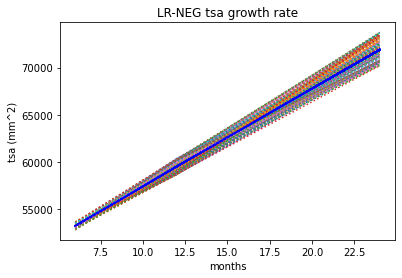

In [21]:
create_line_plot(df, "LR-NEG", "tsa")

This graph shows tsa rates of growth for all HR-NEG infants.
The AGM for tsa of HR-NEG infants is 52986.05278034923 at 6 months, 58044.93393165685 at 12 months, 68007.72846852052 at 24 months. This is represented by the green line.


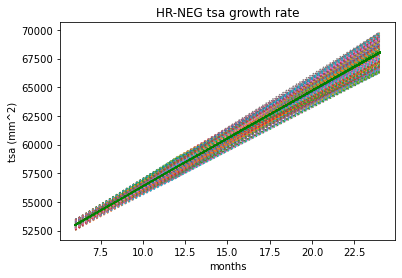

In [22]:
create_line_plot(df, "HR-NEG", "tsa")

This graph shows tsa rates of growth for all HR-ASD infants.
The AGM for tsa of HR-ASD infants is 53784.4984735866 at 6 months, 60761.095479015145 at 12 months, 71918.63490720051 at 24 months. This is represented by the red line.


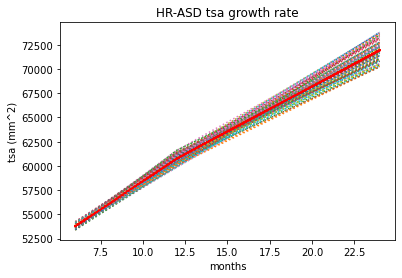

In [23]:
create_line_plot(df, "HR-ASD", "tsa")

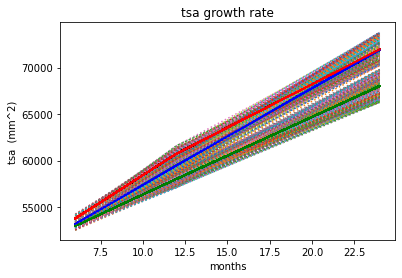

In [24]:
create_total_line_plot(df, "tsa")

#### TSA Results

This figure is reflective of a longitudal trajectory that compares age in months (x-axis) and total surface area (tsa mm^2) (y-axis). Unlike TBV growth, TSA growth has a less clear differentation between HR-ASD and LR-NEG or HR-NEG.

Our graph is slightly inconsistent to Hazlett et al.'s TSA graph in figure 1 because the LR-NEG line in our graph is closer to HR-ASD line whereas in Hazlett et al.'s the HR-NEG line is closer to the HR-ASD line. However, we believe the inconsistency is not due to an incorrect model but rather the idea that the TSA is not a significant differentiater due to the closeness of the means. Meaning, the LR-NEG line being more similar to the HR-ASD line than the HR-NEG line is is a result of random variation in an inherently insignificant model. 


### Variable 3: Total cortical thickness (mm)

In the original study, after collecting the scans and completing image processing, total cortical thickness was measured using CIVET workflow, which is a neuroimaging pipleine.

In [25]:
def find_tct(category, month, noise_level):
    '''
        description : gets close to reproducing the data from Hazlett et al. 2017
        the function is based off of the AGM on Extended Data Table 2 (Hazlett et al. 2017 10)
        
        inputs : category : "category" column from df DataFrame
                month : "month" column from df DataFrame
                noise_level : value meant to vary the data
                
        returns : generated data for TCT based off of month of measurement and diagnosis ''' 
    val = 0
    noise = np.random.uniform(-noise_level, noise_level)
    if category == "LR":
        return month * -0.0239 + 6.0933 + noise #LR
    elif category == "HR-NEG":
        return month * -0.019+ 6.1110 + noise #HR-NEG
    return month * -0.0278+ 6.3 + noise #HR-ASD, check x value, Emily

df["tct"] = df.apply(lambda x : find_tct(x["category"], x["month"], 0.1), axis = 1)
df.head()

,month,category,tbv,tsa,tct
subject,,,,,
subject_0,6,HR-ASD,742.829428,53778.543696,6.078053
subject_0,12,HR-ASD,947.999028,60664.977487,5.921139
subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472
subject_1,6,HR-ASD,756.856778,53985.003559,6.074062
subject_1,12,HR-ASD,988.446581,60143.574653,6.008667


This graph shows tct rates of growth for all LR-NEG infants.
The AGM for tct of LR-NEG infants is 6.1249191499362725 at 6 months, 5.963627878410093 at 12 months, 5.635271126388772 at 24 months. This is represented by the blue line.


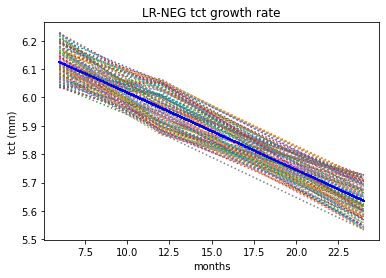

In [26]:
create_line_plot(df, "LR-NEG", "tct")

This graph shows tct rates of growth for all HR-NEG infants.
The AGM for tct of HR-NEG infants is 5.992850552901187 at 6 months, 5.8841343227041865 at 12 months, 5.65750637172518 at 24 months. This is represented by the green line.


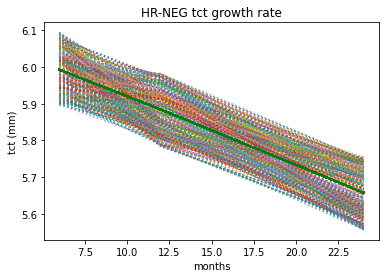

In [27]:
create_line_plot(df, "HR-NEG", "tct")

This graph shows tct rates of growth for all HR-ASD infants.
The AGM for tct of HR-ASD infants is 6.138839026351747 at 6 months, 5.958961811603594 at 12 months, 5.629743641024938 at 24 months. This is represented by the red line.


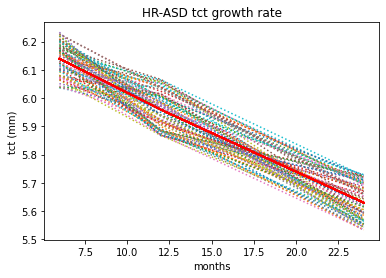

In [28]:
create_line_plot(df, "HR-ASD", "tct")

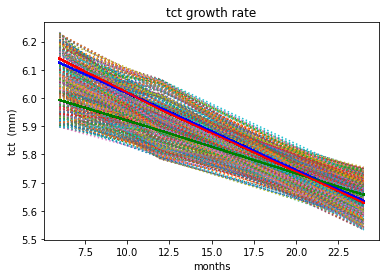

In [29]:
create_total_line_plot(df, "tct")

#### Results:

This figure is reflective of a longitudal trajectory that compares age in months (x-axis) and total cortical thickness (mm)( y-axis). The trajectories corresponding with Figure 2 showing  that HR-ASD, HR-NEG and the LR show no significant discrepencies and follow a similar trend (Hazlett el al. 2017, 2). This implies that cortical thickness may not be a good indicator of an early development of ASD. 

### Generating the Label
Ignoring "tsa"` and `"tct"` columns, if the person is HR-ASD and has a large total brain volume they high chance of having ASD.
If the person is HR-NEG and has a large total brain volume-> high chance of having ASD.
If the person is LR -> low risk.

In [30]:
df["age_group"] = pd.cut(df["month"], 4, labels=["young","middle-young","middle-old", "old"])
df.head()

,month,category,tbv,tsa,tct,age_group
subject,,,,,,
subject_0,6,HR-ASD,742.829428,53778.543696,6.078053,young
subject_0,12,HR-ASD,947.999028,60664.977487,5.921139,middle-young
subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472,old
subject_1,6,HR-ASD,756.856778,53985.003559,6.074062,young
subject_1,12,HR-ASD,988.446581,60143.574653,6.008667,middle-young


In [31]:
avg_tbv_grouped = df.groupby("age_group")["tbv"].mean()
avg_tbv_grouped

age_group
young            751.765854
middle-young     910.549386
middle-old              NaN
old             1035.943500
Name: tbv, dtype: float64

In [32]:
def has_ASD(group, tbv, category):
    if tbv > avg_tbv_grouped[group]: # higher chance for children with higher tsa than the group average
        if category == "HR-ASD":
            return np.random.choice([0, 1], p=[0.3, 0.70]) # HR-ASD and high tsa
        elif category == "HR-NEG":
            return np.random.choice([0, 1], p=[0.50, 0.50]) # HR-NEG and high tsa
        return np.random.choice([0, 1], p=[0.90, 0.10]) # LR and high tsa
    return np.random.choice([0, 1], p=[0.98, 0.02]) # low tsa

df["asd"] = df.apply(lambda x : has_ASD(x["age_group"], x["tbv"], x["category"]), axis = 1)
df


,month,category,tbv,tsa,tct,age_group,asd
subject,,,,,,,
subject_0,6,HR-ASD,742.829428,53778.543696,6.078053,young,0
subject_0,12,HR-ASD,947.999028,60664.977487,5.921139,middle-young,1
subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472,old,1
subject_1,6,HR-ASD,756.856778,53985.003559,6.074062,young,0
subject_1,12,HR-ASD,988.446581,60143.574653,6.008667,middle-young,1
...,...,...,...,...,...,...,...
subject_433,12,LR-NEG,929.724818,60184.129388,5.897394,middle-young,0
subject_433,24,LR-NEG,991.787811,70736.052680,5.672184,old,0
subject_434,6,LR-NEG,740.658199,53047.028803,6.131652,young,0


Children with their total surface area higher than their group average, were placed at high risk.

Each subject was given a 1 under the "asd" column indicating that their tbv is higher than the group average, indicating they could have autism. 

In this section of the code, we are adding a randomness factor of 20% to vary the autism diagnosis and make our generated data less perfect to challenge our prediction pipeline. 

In [33]:
# adding 20% true randoms
selected = np.random.choice([0, 1], len(df), p = [0.8, 0.2])
asd = []

for i in range(len(df)):
    if selected[i] == 0:
        asd.append(df["asd"][i])
    else:
        if df["asd"][i] == 0:
            asd.append(1)
        else:
            asd.append(0)
            
df["asd"] = asd
df

,month,category,tbv,tsa,tct,age_group,asd
subject,,,,,,,
subject_0,6,HR-ASD,742.829428,53778.543696,6.078053,young,0
subject_0,12,HR-ASD,947.999028,60664.977487,5.921139,middle-young,1
subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472,old,0
subject_1,6,HR-ASD,756.856778,53985.003559,6.074062,young,0
subject_1,12,HR-ASD,988.446581,60143.574653,6.008667,middle-young,1
...,...,...,...,...,...,...,...
subject_433,12,LR-NEG,929.724818,60184.129388,5.897394,middle-young,1
subject_433,24,LR-NEG,991.787811,70736.052680,5.672184,old,0
subject_434,6,LR-NEG,740.658199,53047.028803,6.131652,young,0


In [34]:
# drops original category column with diagnosis from df 
df = df.reset_index()
df

,subject,month,category,tbv,tsa,tct,age_group,asd
0,subject_0,6,HR-ASD,742.829428,53778.543696,6.078053,young,0
1,subject_0,12,HR-ASD,947.999028,60664.977487,5.921139,middle-young,1
2,subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472,old,0
3,subject_1,6,HR-ASD,756.856778,53985.003559,6.074062,young,0
4,subject_1,12,HR-ASD,988.446581,60143.574653,6.008667,middle-young,1
...,...,...,...,...,...,...,...,...
1300,subject_433,12,LR-NEG,929.724818,60184.129388,5.897394,middle-young,1
1301,subject_433,24,LR-NEG,991.787811,70736.052680,5.672184,old,0
1302,subject_434,6,LR-NEG,740.658199,53047.028803,6.131652,young,0
1303,subject_434,12,LR-NEG,862.235427,59939.148838,5.942309,middle-young,1


In [35]:
# new array without ASD diagnosis
categories_array_new = (["HR"] * HR_ASD)*3 + (["HR"] * HR_NEG)*3 + (["LR"] * LR_NEG)*3

# creates that array into a df
categories_df = pd.DataFrame(categories_array_new, columns = ["category"])

# creates a DataFrame from categories_array_new to be merged with month_df
df_new = pd.merge(df, categories_df, left_index = True, right_index = True)
df_new

,subject,month,category_x,tbv,tsa,tct,age_group,asd,category_y
0,subject_0,6,HR-ASD,742.829428,53778.543696,6.078053,young,0,HR
1,subject_0,12,HR-ASD,947.999028,60664.977487,5.921139,middle-young,1,HR
2,subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472,old,0,HR
3,subject_1,6,HR-ASD,756.856778,53985.003559,6.074062,young,0,HR
4,subject_1,12,HR-ASD,988.446581,60143.574653,6.008667,middle-young,1,HR
...,...,...,...,...,...,...,...,...,...
1300,subject_433,12,LR-NEG,929.724818,60184.129388,5.897394,middle-young,1,LR
1301,subject_433,24,LR-NEG,991.787811,70736.052680,5.672184,old,0,LR
1302,subject_434,6,LR-NEG,740.658199,53047.028803,6.131652,young,0,LR
1303,subject_434,12,LR-NEG,862.235427,59939.148838,5.942309,middle-young,1,LR


### Saving Data as csv file
Dropping columns to save as a .csv file

In [36]:
df = df_new.drop(columns=["age_group"])
df.to_csv("asd_data.csv", index = False)

# B. Analysis Pipeline

## Predicting ASD and Reading the data

subject (i), group (k), and month (j) are the variables used to use the following brain measure: 

$ Y_{ikj} = (\beta_{0k} + b_{0ik}) + (\beta_{1k} + b_{1ik})t_{ikj} + (\beta_{0k} + b_{0ik})(t_{ikj} - 12) + e_{ikj} $

  The researchers utilized a random-coefficient, piecewise longitudinal mixed model to model their trajectories in the first and second year of life for all 3 groups to test for group differences in growth trajectories. Each model used random coeffeicients for the forst year growth rate (6-12 months) and a change of growth rate in the second year (12-24 months), as well as random intercepts to take into account individuality. 
   To model change in growth rate from the first to second year: $\beta_{1k}$ corresponds with the mean group growth rate for the first year. $ \beta_{1k} + \beta_{2k} $ corresponds with the growth rate for 12 months and beyond.
       To model brain overgrowth separate from general body growth, a corrected, normative age based on body age was used instead of chronological age. The noramtive age for each infant's body size ($t_{ij}$ being the corrected age) was highly correlated with the chrolological age, making it a great candidate for the continuous growth model.
       The researchers used this model to take factors that correlated brain and body growth to decrease the influence of developmental factors, like sex and age, that could potentially skew the results. 

In [37]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [38]:
df = pd.read_csv("asd_data.csv")
df

,subject,month,category_x,tbv,tsa,tct,asd,category_y
0,subject_0,6,HR-ASD,742.829428,53778.543696,6.078053,0,HR
1,subject_0,12,HR-ASD,947.999028,60664.977487,5.921139,1,HR
2,subject_0,24,HR-ASD,1199.926359,71640.603097,5.533472,0,HR
3,subject_1,6,HR-ASD,756.856778,53985.003559,6.074062,0,HR
4,subject_1,12,HR-ASD,988.446581,60143.574653,6.008667,1,HR
...,...,...,...,...,...,...,...,...
1300,subject_433,12,LR-NEG,929.724818,60184.129388,5.897394,1,LR
1301,subject_433,24,LR-NEG,991.787811,70736.052680,5.672184,0,LR
1302,subject_434,6,LR-NEG,740.658199,53047.028803,6.131652,0,LR
1303,subject_434,12,LR-NEG,862.235427,59939.148838,5.942309,1,LR


In [39]:
df = pd.read_csv("asd_data.csv")

# splits data into random train or test subsets
X_train, X_test, y_train, y_test = train_test_split(df[["category_y", "month", "tbv", "tsa", "tct", "asd"]], 
                                                    df["category_y"],
                                                    test_size = 0.2, 
                                                    random_state = 420)

### Baseline model - Linear Regression

In [40]:
# linear regression with one hot encoder for categorical column
categorical = ["category_y"]
numerical = ["month", "tbv", "tsa", "tct"]

# just transforming the numerical data since "category" 
#diagnosis would not be available in a prediction setting
preproc = ColumnTransformer(transformers = [("one-hot", OneHotEncoder(handle_unknown="ignore"), categorical),
                                            ("nothing", FunctionTransformer(lambda x: x), numerical)])

In [41]:
# transforms with a final estimator 
# k neighbor classifier gets ~88.89% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", KNeighborsClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

0.8726053639846744

In [42]:
# supported vector machine gets ~72.61% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", SVC())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

0.7260536398467433

In [43]:
# Preprocessing using a decision tree classifier in which performs 
# a multi-class classification on dataset
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", DecisionTreeClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

In [44]:
# Preprocessing using a ridge regression classifier in which converts the respective values 
# to values within {-1, 1} and treats such values as a regression task
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", lm.RidgeClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

In [45]:
# Preprocessing using a adaboost classifier in which performs by fitting the classifer 
# on the original dataset then adjusts the weights of incorrect classified instances  
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", AdaBoostClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

In [46]:
# Preprocessing using a random forest classifer which performs by fitting 
# decision tree classifiers on the dataset then averages to improve the prediction accuracy 
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", RandomForestClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

As seen by the high values of the accuracy scores, the categorical data/pipeline may be too simplistic when attempting to predict ASD in the subjects since it is not nearly equivalent to the original study's prediction of accuracy to be about 87%.

#### Predicting ASD with just numerical data

A prediction pipeline without the categorical variable or HR and LR was formulated into the replication, because the original study included both categorical and numerical data in their prediction.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[["category_y", "month", "tbv", "tsa", "tct"]], 
                                                    df["asd"], 
                                                    test_size = 0.2, 
                                                    random_state = 420)

In [48]:
# linear regression with one hot encoder for categorical column
numerical = ["month", "tbv", "tsa", "tct"]

# just transforming the numerical data since "category" 
#diagnosis would not be available in a prediction setting
preproc = ColumnTransformer(transformers = [("nothing", FunctionTransformer(lambda x: x), numerical)])

In [49]:
# transforms with a final estimator 
# k neighbor classifier gets ~74.14% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", KNeighborsClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

0.7442528735632183

In [50]:
# supported vector machine gets ~63.7% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", SVC())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

0.6187739463601533

In [51]:
# Preprocessing using a decision tree classifier in which performs 
# a multi-class classification on dataset
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", DecisionTreeClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

In [52]:
# Preprocessing using a ridge regression classifier in which converts the respective values 
# to values within {-1, 1} and treats such values as a regression task
# Yields ~64.56% accuracy with a score of ~0.6456. 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", lm.RidgeClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

0.6561302681992337

In [53]:
# Preprocessing using a adaboost classifier in which performs by fitting the classifer 
# on the original dataset then adjusts the weights of incorrect classified instances  
# Yields ~69.06% accuracy with a score of ~.6906
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", AdaBoostClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

0.7145593869731801

In [54]:
# Preprocessing using a random forest classifer which performs by fitting 
# decision tree classifiers on the dataset then averages to improve the prediction accuracy 
# Yields 100% accuracy with a score of 1.0
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", RandomForestClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

Although this pipeline proves to have a mean accuracy closer to the original study, there is now a broad spectrum of accuracy scores that continues to prove that the categorical data/pipeline may be too simplistic when attempting to predict ASD in the subjects.

# C. Data Visualization

### Scatter Plots - Observing Relationship

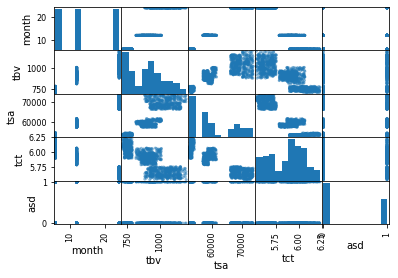

In [55]:
# this scatterplot shows the relationship between each column
pd.plotting.scatter_matrix(df)
plt.show()

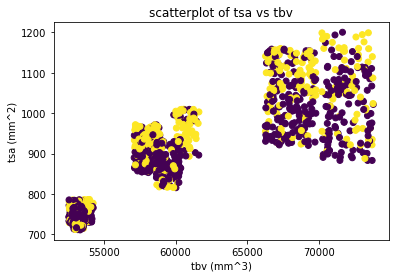

In [56]:
# this plot shows that even with tsa and tbv (which have very good predictive power) alone cannot reliably
# separate the two asd groups
# because of this, linear classifier (and linear model in general) does not work as well, only 84% accurate

plt.scatter(df["tsa"], df["tbv"], label = "scatterplot of tsa vs tbv", c = df["asd"])

plt.title("scatterplot of tsa vs tbv")
plt.xlabel( "tbv (mm^3)")
plt.ylabel("tsa (mm^2)")
plt.show()

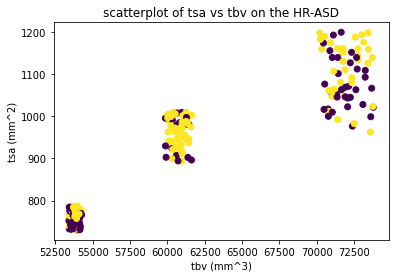

In [57]:
# now lets take a look at the same plot but broken down into category
# HR-ASD high risk group
hr_asd = df[df["category_x"] == "HR-ASD"]
plt.scatter(hr_asd["tsa"], hr_asd["tbv"], label = "scatterplot of tsa vs tbv on the HR-ASD", c = hr_asd["asd"])

plt.title("scatterplot of tsa vs tbv on the HR-ASD")
plt.xlabel("tbv (mm^3)")
plt.ylabel("tsa (mm^2)")
plt.show()

# even within the same category, the there is really no linear relationship 
# (cannot draw a line and split the data into ASD and no-ASD)

### What do these scatterplots tell us?
When viewing the relationship between the data, these scatterplots provide insight into the lack of a linear relationship present in the replication of the study. 

### Linear Model for Prediction

In [58]:
# using a linear model for prediction (even though the data is not linear)
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", lm.RidgeClassifier())])
pl.fit(X_train, y_train)

predicted_df = X_test.copy(deep=True)
predicted_df["prediction"] = pl.predict(X_test)
predicted_df["actual"] = y_test
predicted_incorrect = predicted_df[predicted_df["prediction"] != predicted_df["actual"]]
predicted_incorrect.describe()

,month,tbv,tsa,tct,prediction,actual
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,13.736842,895.411317,60431.737453,5.881750,0.184211,0.815789
std,7.640887,130.236558,7277.604220,0.184820,0.390232,0.390232
min,6.000000,718.159240,52642.653431,5.559942,0.000000,0.000000
25%,6.000000,769.942588,53303.351397,5.706710,0.000000,1.000000
50%,12.000000,918.722948,58662.648297,5.916341,0.000000,1.000000
75%,24.000000,966.190775,67564.778176,6.012528,0.000000,1.000000
max,24.000000,1156.071427,73713.707227,6.225893,1.000000,1.000000


Based on the chart above, the linear model underpredicted a lot of the cases. Amongst the incorrect predictions, up to 93.81% of them actually have ASD (`actual` column, `mean` row). However, we only predict 6.18% of them having ASD (`predition` column, `mean` row).

## Considering Classifier Performance

The prediction values of the original dataset involving both categorical and numerical datasets result in the approximate values of the KNN = 88.89%, SVC = 72.61%, DecisionTree = 100%, RidgeClassifer = 100%, Adaboost = 100%, and RandomForest = 100%. While the prediction values of the dataset involving only the numerical dataset approximately consist of KNN = 74.14%, SVC = 63.7%, DecisionTree = 100%, RidgeClassifer = 64.56%, Adaboost = 69.06%, and RandomForest = 100%. Considering how in both datasets the DecisionTree and RandomForest Classifiers result in a 100% accuracy is due to the mechanism behind such classifiers consisting of 'if and else' statements, in which such statements are used to generate our respective data, allowing for the 100% accuracy prediction rate from being able to learn the underlying model perfectly. But, we can see that the dataset consisting of both categorical and numerical data to have 100% accuracy prediction rate for the Ridge Classifier and AdaBoost, while the only numerical dataset has RidgeClassifer resulting in 64.56% and Adaboost in 69.06%. These differences can denote that our pipeline processing the dataset involving both categorical and numerical data may be too simplistic in processing such data from having such high accuracies in comparison to the strict numerical dataset. Such can also be seen in the dataset with categorical and numerical data to have a higher KNN and SVC than using just numerical data. 

Considering the Tree Classifier, the tree model has the ability to unravel the process of creating the data and getting the underlying data correctly. Such prediction models are mostly comprised of a lot of if and else statements, which is exactly the same way that we use to generate the data. In which, that's what we predict why it results in a 100% accuracy prediction on unseen data, because it learns the underlying model perfectly. This prediction applies to the Random Forest Classifier as well in yielding a 100% accuracy as well, due to such classifer consisting of multiple decision tree classifiers

Considering k-NN, the process is almost as similar as Tree structure in which the kNN can learn the underlying model by grouping similar data points together. With this, it is able to learn the if-else conditions that we set up to recreate the data.


# IV. Additional dataset & Analysis

### A. Creating Additional Dataset

This dataset stems from the idea that human variation should also be taken into account in order for a model to be realistically valid. The data was generated by increasing noise and randomness to take into account that the original study also experienced different results than expected due to differences in human behavior.

In [60]:
# triples the noise for each feature (tbv, tsa, and tct)
df_empty["tbv"] = df_empty.apply(lambda x : find_tbv(x["category"], x["month"], 15), axis = 1)
df = df_empty

df["tsa"] = df.apply(lambda x : find_tsa(x["category"], x["month"], 225), axis = 1)

df["tct"] = df.apply(lambda x : find_tct(x["category"], x["month"], 0.3), axis = 1)

df.head()

,month,category,tbv,tsa,tct,age_group,asd
subject,,,,,,,
subject_0,6,HR-ASD,795.427709,53678.730806,6.415806,young,0
subject_0,12,HR-ASD,984.503774,60600.961024,6.050905,middle-young,1
subject_0,24,HR-ASD,1019.377489,71490.690021,5.764653,old,0
subject_1,6,HR-ASD,712.937435,53152.793318,5.861077,young,0
subject_1,12,HR-ASD,961.706985,58778.020920,5.871455,middle-young,1


In [61]:
# adding 30% true randoms versus 20% in original data set
selected = np.random.choice([0, 1], len(df), p = [0.7, 0.3])
asd = []

for i in range(len(df)):
    if selected[i] == 0:
        asd.append(df["asd"][i])
    else:
        if df["asd"][i] == 0:
            asd.append(1)
        else:
            asd.append(0)
            
df["asd"] = asd
df

,month,category,tbv,tsa,tct,age_group,asd
subject,,,,,,,
subject_0,6,HR-ASD,795.427709,53678.730806,6.415806,young,0
subject_0,12,HR-ASD,984.503774,60600.961024,6.050905,middle-young,0
subject_0,24,HR-ASD,1019.377489,71490.690021,5.764653,old,0
subject_1,6,HR-ASD,712.937435,53152.793318,5.861077,young,0
subject_1,12,HR-ASD,961.706985,58778.020920,5.871455,middle-young,0
...,...,...,...,...,...,...,...
subject_433,12,LR-NEG,856.022047,59725.205435,5.976385,middle-young,1
subject_433,24,LR-NEG,917.205150,74046.030019,5.859178,old,0
subject_434,6,LR-NEG,750.366666,53098.941811,5.976453,young,0


In [62]:
df = df.reset_index()

In [63]:
# new array without ASD diagnosis
categories_array_new = (["HR"] * HR_ASD)*3 + (["HR"] * HR_NEG)*3 + (["LR"] * LR_NEG)*3

# creates that array into a df
categories_df = pd.DataFrame(categories_array_new, columns = ["category"])

# creates a DataFrame from categories_array_new to be merged with month_df
df_new = pd.merge(df, categories_df, left_index = True, right_index = True)

In [64]:
df = df_new.drop(columns=["age_group"])
df.to_csv("asd_data.csv", index = False)

### B. Explanation
By increaing the noise level by 3x and increasing ASD randomness by 10%, we hope to decrease the predictive power of our pipeline, which is seen in the 100% accuracy scores. This addressed the question we had on the ability for the data to accurately predict ASD while also taking into account the external validity of the model. 

#### Baseline model - Linear Regression

In [65]:
df = pd.read_csv("asd_data.csv")

# splits data into random train or test subsets
X_1train, X_1test, y_1train, y_1test = train_test_split(df[["category_y", "month", "tbv", "tsa", "tct", "asd"]], 
                                                    df["category_y"],
                                                    test_size = 0.2, 
                                                    random_state = 420)

In [66]:
df = df.set_index("subject")

In [67]:
# linear regression with one hot encoder for categorical column
categorical = ["category_y"]
numerical = ["month", "tbv", "tsa", "tct"]

# just transforming the numerical data since "category" 
# diagnosis would not be available in a prediction setting
preproc = ColumnTransformer(transformers = [("one-hot", OneHotEncoder(handle_unknown="ignore"), categorical),
                                           ("nothing", FunctionTransformer(lambda x: x), numerical)])

In [68]:
# transforms with a final estimator 
# k neighbor classifier gets ~79.5% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", KNeighborsClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

0.7921455938697318

In [69]:
# supported vector machine gets ~72.61% correct
pl = Pipeline(steps = [('preproc', preproc), 
                      ("lin-reg", SVC())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

0.7260536398467433

In [70]:
# Preprocessing using a decision tree classifier in which performs 
# a multi-class classification on dataset
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", DecisionTreeClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

1.0

In [71]:
# Preprocessing using a ridge regression classifier in which converts the respective values 
# to values within {-1, 1} and treats such values as a regression task
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                     ("lin-reg", lm.RidgeClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

1.0

In [72]:
# Preprocessing using a adaboost classifier in which performs by fitting the classifer 
# on the original dataset then adjusts the weights of incorrect classified instances  
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", AdaBoostClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

1.0

In [73]:
# # Preprocessing using a random forest classifer which performs by fitting 
# # decision tree classifiers on the dataset then averages to improve the prediction accuracy 
# # Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", RandomForestClassifier())])
pl.fit(X_train, y_train)
pl.score(X_train, y_train)

1.0

#### Additional Dataset: Predicting ASD with just numerical data

In [74]:
X_1train, X_1test, y_1train, y_1test = train_test_split(df[["category_y", "month", "tbv", "tsa", "tct"]], 
                                                    df["asd"], 
                                                    test_size = 0.2, 
                                                    random_state = 420)

In [75]:
# linear regression with one hot encoder for categorical column
numerical = ["month", "tbv", "tsa", "tct"]

# just transforming the numerical data since "category" 
# diagnosis would not be available in a prediction setting
preproc = ColumnTransformer(transformers = [("nothing", FunctionTransformer(lambda x: x), numerical)])

In [76]:
# transforms with a final estimator 
# k neighbor classifier gets ~69.16% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", KNeighborsClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

0.6839080459770115

In [77]:
# supported vector machine gets ~55.56% correct
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", SVC())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

0.5498084291187739

In [78]:
# Preprocessing using a decision tree classifier in which performs 
# a multi-class classification on dataset
# Yields 100% accuracy with a score of 1.0 
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", DecisionTreeClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

1.0

In [79]:
# Preprocessing using a ridge regression classifier in which converts the respective values 
# to values within {-1, 1} and treats such values as a regression task
# Yields ~55.56% accuracy with a score of 0.5556
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", lm.RidgeClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

0.5545977011494253

In [80]:
# Preprocessing using a adaboost classifier in which performs by fitting the classifer 
# on the original dataset then adjusts the weights of incorrect classified instances  
# Yields ~63.12% accuracy with a score of ~.6312
pl = Pipeline(steps = [('preproc', preproc), 
                       ("lin-reg", AdaBoostClassifier())])
pl.fit(X_1train, y_1train)
pl.score(X_1train, y_1train)

0.632183908045977

### D. Results

As seen in the linear regression of the original dataset with both categorical and numerical data, by increasing the noise level by 3x and increasing ASD randomness by 10%, we were still unable to decrease the predictive power of our pipeline, which is seen in the 100% accuracy scores. We believe this indicates that our original function to create the data was oversimplified. This may be due to basing our functions off of the adjusted group means, which were supposed account for sex, size, and age variability, but may have led to an oversimplified model. 

More specifically, the prediction values of the additional dataset involving both categorical and numerical datasets result in the approximate values of the KNN = 79.5%, SVC = 72.61%, DecisionTree = 100%, RidgeClassifer = 100%, Adaboost = 100%, and RandomForest = 100%. While the prediction values of the dataset involving only the numerical dataset approximately consist of KNN = 69.16%, SVC = 55.5%, DecisionTree = 100%, RidgeClassifer = 55.56%, Adaboost = 63.12%, and RandomForest = 100%. As mentioned earlier, both additional datasets for DecisionTree and RandomForest Classifiers result in a 100% accuracy due to the mechanism behind such classifiers consisting of 'if and else' statements which allow the pipeline to be able to learn the underlying model perfectly. We still can see in the additional dataset consisting of both categorical and numerical data to still have a 100% accuracy prediction rate for the Ridge Classifier and AdaBoost, while the only numerical dataset has RidgeClassifer resulting in 55.56% and Adaboost in 63.12%; still denoting that our pipeline may still be too simplified even when increasing the variability and noise in the dataset. Also, we can see that the prediction scores, excluding the ones resulting in 100%, within the additional dataset are overall slightly lower than from the original dataset, yet still somewhat consistent with the paper's prediction values. But, again, this can be due to the fact that we had a greater variability from increasing the noise and randomness in the generated, additional dataset. 

### E. Visualizations

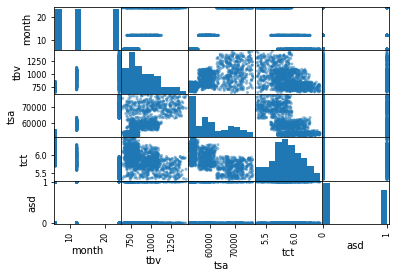

In [81]:
# this scatterplot shows the relationship between each column
pd.plotting.scatter_matrix(df)
plt.show()

Overall, we are visualizing the relationships between each group/predictor in order to view if there's a specific relationship between each one. This scatterplot conveys the relationship between each group and provides a general overview, but as we can see there is no direct linear relationship between the respective groups.

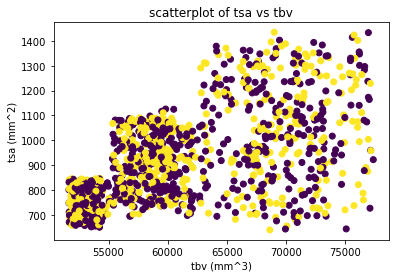

In [82]:
# this plot shows that even with tsa and tbv (which have very good predictive power) alone cannot reliably
# separate the two asd groups
# because of this, linear classifier (and linear model in general) does not work as well, only 84% accurate

plt.scatter(df["tsa"], df["tbv"], label = "scatterplot of tsa vs tbv", c = df["asd"])

plt.title("scatterplot of tsa vs tbv")
plt.xlabel( "tbv (mm^3)")
plt.ylabel("tsa (mm^2)")
plt.show()

Since we have looked it generally, lets just double check in viewing (more closely) of the relationship between two of the groups/predictors. We have chosen tsa vs tbv because they seem to be the greatest/most significant predictors for ASD, so only makes sense to evaluate if they have a relationship with each other. but, they do not have a linear relationship to each other. we're able to observe this from as we're increasing TBV, there remains a wide range of TSA values; vice versa in when we observe specific values of TSA, we find a wide range of TBV values. tbf, we should observe this wide range of variablitiy from our additional dataset (in comparison to our original one) being made on purpose to include a huge variablity; but even with this in mind, we fail to see a linear relationship between these significant predictors.

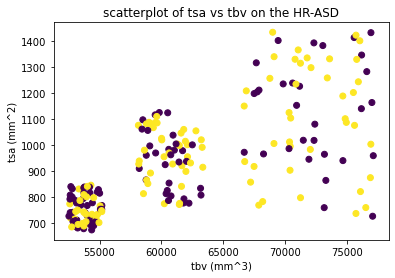

In [83]:
# now lets take a look at the same plot but broken down into category
# HR-ASD high risk group
hr_asd = df[df["category_x"] == "HR-ASD"]
plt.scatter(hr_asd["tsa"], hr_asd["tbv"], label = "scatterplot of tsa vs tbv on the HR-ASD", c = hr_asd["asd"])

plt.title("scatterplot of tsa vs tbv on the HR-ASD")
plt.xlabel("tbv (mm^3)")
plt.ylabel("tsa (mm^2)")
plt.show()

# even within the same category, the there is really no linear relationship 
# (cannot draw a line and split the data into ASD and no-ASD)

In this scatterplot we continue to look at tsa vs tbv, but what about if we only evaluate this for those who are high-risk with ASD. This is to identify a potential relationship between the early indicators and paricipants at risk for HR-ASD. There is stil not an observed linear relationship between such predictors for a similar reason as the previous scatterplot and could be due to the wide variablity of this dataset.

### Results:
In comparison to the first dataset that was made, we still recognize that there is still an issue with the predictive nature of our original model. Within the pipeline there are predictive accuracies that reflect the original study, but overall, there is little difference in adding variability to the data. 

# V. Discussion/Conclusion

Overall, our replication of the pipeline has somewhat yielded results that followed the same trends reflected in the study "Early brain development in infants at high risk for autism spectrum disorder," by Hazlett et al. Our group had troubles in replicating the pipeline due to the original pipeline being in a MatLab format as well as lacking a dataset that was used in the original pipeline. Replicating the pipeline to a Python format, especially without having a dataset to reference or an understanding of how the original pipeline functioned, we predicted that our version of the pipeline to be more simple or simplify certain parts of the original pipeline. With such expectations, our group expected that our results might not yield similar consistencies as visualized and reported in the respective paper, Hazlett et al. (2017). Our line graph visualizations in our re-created dataset proved to be similar to the visualizations of the figures in the paper, such as our visualization of the Total Brain Volume is similar to Figure 1. In terms of the pipeline's prediction results, our results did come out somewhat successful in which our prediction accuracy along the pipelines ranged from 64-100%, but a prediction accuracy that broad denotes that something must be off and there must be a part of our version of the pipeline that yielded unsuccessful. Because of the lack of a linear relationship seen in the scatterplots, it can be assumed that running a linear regression model for our replication may have not been the best model to convey the validity of the original study's results. In Hazlett et al. (2017), they mentioned their prediction to have ~87% accuracy. This indicates that there must be a part within our re-created pipeline that's more simplified than the original pipeline. We used a linear model bc the the visualizations and prediction accuracies reflected a linear relationship but the model shows up that the data is actually nonlinear, which ties in our prediction that the data replication was oversimplified. Because we only had the adjusted group means and extended fig 2 from the original study, this was the best of our capabilities. If given the original dataset, we might have been able to show a stronger relationship between the model and our prediction scores.In order for our pipeline to yield more sucess, being able to obtain a dataset that was used within the original pipeline to reference and observe how the original pipeline functioned would allow our group to replicate more of the complexities used in the original pipeline. In the additional dataset, we attempted to solve this issue by increasing variability and produce results that are much more reflective of the external validity that comes with human variation and individuality. We increased the noise level and added randomness for each of the formulas, noted by the functions find_(tct,tbv,tsa), in order for it to have more variability less predictive power when our pipeline takes into account both risk and numerical values. Unfortunately we were unable to fix the simplicity of our original data and the additional dataset reflected similar problems in the prediction accuracies, although they did seem to improve slightly. More specifically, this is showcased through the prediction accuracies of the pipeline when processing both categorical and numerical data to be slightly too accurate with prediction scores of 100%, while when processing strictly the numerical data would yield similar prediction values as referenced in the paper; overall indcating that our pipeline for processing both categorical and numerical data may be too simplistic. ur current recreated pipelines contains limitations from possibly being too simple, from yielding 64-100% prediction accuracies from our pipelines, and could be improved if we were to able to observe how the original code in MatLab ran with the respective data. Our replication could possibly be improved if we were to recreate the pipeline in MatLab, due to our translation to Python might have yielded the pipeline to be simplified. But, with our re-created data and results, we are able to affirm Hazlett et al. (2017)'s findings that Total Brain Volume (TBV) is the best brain feature for early prediction of Autism Spectrum Disorder (ASD) in infants with measurements from 6 to 12 months for a diagnosis at 24 months in which our replicated prediction pipeline yields a 100% accuracy in predicting ASD for High-Risk (HR) infants based on their TBV.

# VI. Citations

Hazlett, H. C., Gu, H., Munsell, B. C., Kim, S. H., Styner, M., Wolff, J. J., Elison, J. T., Swanson, M. R., Zhu, H., Botteron, K. N., Collins, D. L., Constantino, J. N., Dager, S. R., Estes, A. M., Evans, A. C., Fonov, V. S., Gerig, G., Kostopoulos, P., McKinstry, R. C., Pandey, J., … Statistical Analysis (2017). Early brain development in infants at high risk for autism spectrum disorder. Nature, 542(7641), 348–351. https://doi.org/10.1038/nature21369

Ozono, S. et al. A prospective study of the emergence of early behavioral signs of autism. J. Am. Acad. Child Adolesc. Psychiatry 49, 256–266.e1, 2 (2010). 4. Zwaigenbaum, L. et al. Behavioral manifestations of autism in the 1st year of life. Int. J. Dev. Neurosci. 23, 143–152 (2005).

Shen, M. et al. Brain and behavioral development in autism from birth through infancy. PubMed Central, 19(4), 325-333 (2017. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5789210/ 


Ozonoff et al. A Prospective study of the emergence os early behavioral signs of autism. J. Am. Acad. Child Adolesc. Psychiatry 68, 467-476 (2010).

Shen, M et al. Early enlargement and elevated extra-axial fluid in infants who develop autism spectrum disorder. PubMed Central, 136(9), 2825-2835 (2013). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3754460/#:~:text=Infants%20who%20developed%20ASD%20had,months%20(P%20%3C%200.01).

Hazlett, H. C. et al. Magnetic resonance imaging and head circumference study of brain size in autism: birth through age 2 years. Arch. Gen. Psychiatry 62, 1366-1376 (2005).


# VI. Feedback Rebuttal 

The feedback on our proposal highlighted confusion on the goal to create an addtional dataset from the original data. We were unable to gain access to the original data, however, using the feedback from the proposal on the dataset, we were able to formulate a plan and create the randomized dataset used for our replication.